In [ ]:
# This file compares masks drawn by humans to those by SAM2 to validate our methods 
# Written by Kevin Li, June 2025

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import binary_fill_holes
import os
import matplotlib as mpl

In [ ]:
# Show masks from SAM2
def show_mask(mask, ax, obj_id=None, random_color=False, color_rgb=None, alpha=1):
    if color_rgb is not None:
        color = np.array([*color_rgb, 0.6])
    elif random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])

    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image, alpha=alpha)

# Obtain masks from biologist segmentation
def getMasks(directory):
    return [f for f in os.listdir(directory) if f.endswith(".jpg")]

In [ ]:
# Calculating dice scores from first biologist

folder = 'Bio1'
data = getMasks(folder)
difference = []
dice2 = []
filleds = []
for entry in data:
    mask = np.squeeze(np.load('masks/0s/' + entry[:-4] + '.npy'))
    raw_img = np.asarray(Image.open(folder + '/' + entry))
    red = raw_img[:,:,0]
    green = raw_img[:,:,1]
    seg_img = (red > 120) & (green < 100)
    filled = binary_fill_holes(seg_img)
    difference.append(sum(sum(filled ^ mask))/sum(sum(filled)))
    dice2.append(2*np.sum(filled & mask)/(np.sum(filled) + np.sum(mask)))
    filleds.append(filled)
    print(entry[:-4] + ' finished ' + str(sum(sum(filled ^ mask))/sum(sum(filled))) + ' ' + str(2*np.sum(filled & mask)/(np.sum(filled) + np.sum(mask))))


B6 finished 0.37667560321715815 0.7679603633360859
C5 finished 0.2138047138047138 0.8986432561851556
B7 finished 0.2672508214676889 0.8683926645091694
A12 finished 0.2618296529968454 0.8493647912885662
A4 finished 0.28512396694214875 0.8353221957040573
A3 finished 0.17590822179732313 0.9103313840155945
C6 finished 0.27695800227014755 0.8495684340320592
D12 finished 0.2320627802690583 0.8778761061946903
D5 finished 0.11776859504132231 0.9411764705882353
G1 finished 0.19907407407407407 0.9009976976208749


In [ ]:
# Calculating dice scores from second biologist

folder = 'Bio1'
data = getMasks(folder)
difference = []
dice1 = []
for entry in data:
    mask = np.squeeze(np.load('masks/0s/' + entry[:-4] + '.npy'))
    raw_img = np.asarray(Image.open(folder + '/' + entry))
    red = raw_img[:,:,0]
    blue = raw_img[:,:,2]
    seg_img = (blue > 150) & (red < 50)
    filled = binary_fill_holes(seg_img)
    difference.append(sum(sum(filled ^ mask))/sum(sum(filled)))
    dice1.append(2*np.sum(filled & mask)/(np.sum(filled) + np.sum(mask)))
    print(entry[:-4] + ' finished ' + str(sum(sum(filled ^ mask))/sum(sum(filled))) + ' ' + str(2*np.sum(filled & mask)/(np.sum(filled) + np.sum(mask))))

B8 finished 0.27505330490405117 0.8413284132841329
D4 finished 0.342668863261944 0.7936507936507936
B7 finished 0.29063604240282687 0.8412928123492522
D6 finished 0.33225108225108224 0.8126906650396584
G2 finished 0.37013669821240797 0.7772151898734178
D3 finished 0.35152284263959394 0.8085694540428473
E4 finished 0.32744924977934686 0.804221635883905
D5 finished 0.3869281045751634 0.7632
G1 finished 0.3474065138721351 0.8059299191374663
F3 finished 0.37023809523809526 0.7792760823278921


<Figure size 1920x1440 with 0 Axes>

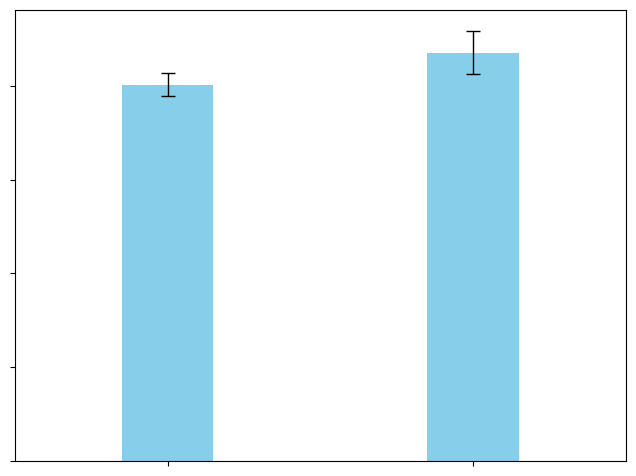

In [ ]:
# Plotting Dice Data for visualization purposes

import matplotlib.pyplot as plt
import numpy as np

plt.close('all')
data = [dice1, dice2]

a = np.array(data)
plt.figure(dpi=300)

means = np.mean(a, axis=1)
std_devs = np.std(a, axis=1)
variances = np.var(a, axis=1)

lower_errors = std_devs  
upper_errors = std_devs                  
asymmetric_error = [lower_errors, upper_errors]

# Bar plot
x = np.arange(len(means))
fig, ax = plt.subplots()
ax.bar(x, means, color='skyblue', width = 0.3)
mpl.rcParams['font.size'] = 8
mpl.rcParams['axes.linewidth'] = 1.3
mpl.rcParams['xtick.major.width'] = 1.1
mpl.rcParams['ytick.major.width'] = 1.1
mpl.rcParams['xtick.minor.width'] = 0.9
mpl.rcParams['ytick.minor.width'] = 0.9
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.minor.size'] = 3

# Add error bars (flathead style, only on top)
ax.errorbar(
    x, means,
    yerr=asymmetric_error,
    fmt='none',
    ecolor='black',
    elinewidth=1,
    capsize=5,
    capthick=1
)

ax.set_xticks(x)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(-0.5, 1.5)

plt.tight_layout()
plt.show()
